In [1]:
from Helper_modules import denoiser, helper_func, import_img, noise, evaluator
import os
import numpy as np

In [2]:
base_dir = os.getcwd()  # Current working directory

# Set the Import image and convert it to numpy array and normalize it

In [3]:
image_path = f"{base_dir}/Dataset/train/005_img.png"
image = import_img.load_and_normalize_image(image_path)

# Initialize differnt type of Noises and plot them

In [4]:
gaussian_noisy_image = noise.add_gaussian_noise(image)
salt_und_pepper_noisy_image = noise.add_salt_and_pepper_noise(image)
poisson_noisy_image = noise.add_poisson_noise(image)
speckle_noisy_image = noise.add_speckle_noise(image)

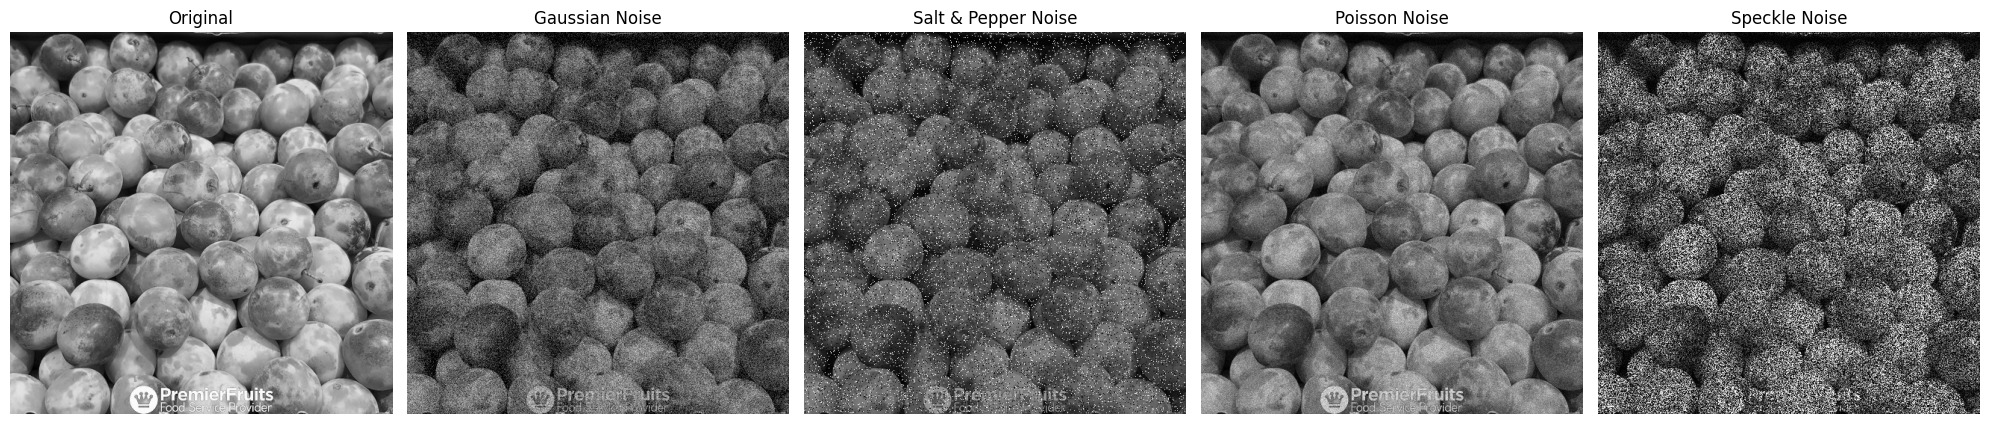

In [5]:
helper_func.plot_noisy_images(image, gaussian_noisy_image, salt_und_pepper_noisy_image, poisson_noisy_image, speckle_noisy_image)

# Set the noise type nad select the noise

In [6]:
noisy_image = salt_und_pepper_noisy_image
noise_type = "Salt And Pepper Noise"

# Evaluator of all denoiser to find the best hyperparameters

In [7]:
denoiser = denoiser.ImageDenoiser(image, noisy_image=noisy_image)
evaluator = evaluator.DenoisingEvaluator(image, noisy_image)

# Gaussian

In [8]:
# Example usage for Gaussian Denoising
gaussian_param_grid = {
    'd': [3, 5, 7, 9, 11],
    'sigmaX': [1, 2, 3, 4, 5]
}
gaussian_denoise_func = lambda d, sigmaX: denoiser.denoise_with_gaussian_blur(kernel_size=(d, d), sigmaX=sigmaX)
# Run Gaussian denoising evaluation
best_gaussian_psnr, best_gaussian_params = evaluator.evaluate_denoising(gaussian_denoise_func, gaussian_param_grid, 'numbers/gaussian_psnr_results.csv', 'Gaussian')
denoised_gaussian = gaussian_denoise_func(**best_gaussian_params)

# Bilateral

In [9]:
# Example usage for Bilateral Filter Denoising
bilateral_param_grid = {
    'd': [3, 5, 7, 9, 11],
    'sigma_color': [25, 50, 75, 100, 125],
    'sigma_space': [25, 50, 75, 100, 125]
}
bilateral_denoise_func = lambda d, sigma_color, sigma_space: denoiser.denoise_with_bilateral_filter(
    d=d, sigma_color=sigma_color, sigma_space=sigma_space
)
# Run Bilateral filter evaluation
best_bilateral_psnr, best_bilateral_params = evaluator.evaluate_denoising(bilateral_denoise_func, bilateral_param_grid, 'numbers/bilateral_psnr_results.csv', 'Bilateral')


# NLM

In [10]:
# Example usage for Non-Local Means Denoising
nlm_param_grid = {
    'h': list(range(10, 100, 10)),
    'templateWindowSize': list(range(5, 21, 2)),
    'searchWindowSize': list(range(5, 11, 2))
}
nlm_denoise_func = lambda h, templateWindowSize, searchWindowSize: denoiser.denoise_with_nonlocal_means(
    h=h, templateWindowSize=templateWindowSize, searchWindowSize=searchWindowSize
)
# Run Non-Local Means filter evaluation
best_nlm_psnr, best_nlm_params = evaluator.evaluate_denoising(
    nlm_denoise_func, nlm_param_grid, 'numbers/nlm_psnr_results.csv', 'Nonlocal Means')


# Median Filter

In [11]:
median_param_grid = {
    'size': [3, 5, 7, 9, 11]
}
median_denoise_func = lambda size: denoiser.denoise_with_median_filter(size=size)
# Run Median Filter denoising evaluation
best_median_psnr, best_median_params = evaluator.evaluate_denoising(median_denoise_func, median_param_grid, 'numbers/median_psnr_results.csv', 'Median')
denoised_median = median_denoise_func(**best_median_params)

# BM3D(our)

In [12]:
# Define BM3D parameter grid
bm3d_param_grid = {
    'patch_size': [30],
    'stride': [10],
    'threshold': [0.23],
    'similarity_threshold': [5]
}
bm3d_denoise_func = lambda patch_size, stride, threshold, similarity_threshold: denoiser.denoise_with_bm3d(
    patch_size=patch_size, stride=stride, threshold=threshold, similarity_threshold=similarity_threshold
)
# Run BM3D evaluation
best_bm3d_psnr, best_bm3d_params = evaluator.evaluate_denoising(bm3d_denoise_func, bm3d_param_grid, 'numbers/bm3d_psnr_results.csv', 'BM3D')

# BM3D(Library)

In [13]:
import bm3d
# Define BM3D with sigma_psd parameter grid
bm3d2_param_grid = {
    'sigma_psd': [0.25]
}
bm3d2_denoise_func = lambda sigma_psd: bm3d.bm3d(evaluator.noisy_image, sigma_psd=sigma_psd)
# Run BM3D with sigma_psd evaluation
best_bm3d2_psnr, best_bm3d2_params = evaluator.evaluate_denoising(bm3d2_denoise_func, bm3d2_param_grid, 'numbers/bm3d2_psnr_results.csv','BM3D2')

# Wavelet

In [14]:
# Example usage for Wavelet Denoising
wavelet_param_grid = {
    'sigma': [0.1, 0.2, 0.3, 0.4],
    'method': ['VisuShrink', 'BayesShrink'],
    'mode': ['soft', 'hard']
}
wavelet_denoise_func = lambda sigma, method, mode: denoiser.denoise_with_wavelet(sigma=sigma, method=method, mode=mode)
# Run Wavelet denoising evaluation
best_wavelet_psnr, best_wavelet_params = evaluator.evaluate_denoising(wavelet_denoise_func, wavelet_param_grid, 'numbers/wavelet_psnr_results.csv', 'Wavelet')
denoised_wavelet = wavelet_denoise_func(**best_wavelet_params)

# Bergman TV

In [15]:
# Example usage for TV Bregman Denoising
tv_bregman_param_grid = {
    'weight': [0.1, 0.15, 0.2, 0.25],
    'max_iter': [100, 150, 200, 250]
}
tv_bregman_denoise_func = lambda weight, max_iter: denoiser.denoise_with_tv_bregman(weight=weight, max_iter=max_iter)
# Run TV Bregman denoising evaluation
best_tv_bregman_psnr, best_tv_bregman_params = evaluator.evaluate_denoising(tv_bregman_denoise_func, tv_bregman_param_grid, 'numbers/tv_bregman_psnr_results.csv', 'TV_Bregman')
denoised_tv_bregman = tv_bregman_denoise_func(**best_tv_bregman_params)

# TV Chambolle

In [16]:
# Example usage for TV Chambolle Denoising
tv_chambolle_param_grid = {
    'weight': [0.05, 0.1, 0.15, 0.2],
    'eps': [1e-4, 1e-3, 1e-2, 1e-1],
    'max_iter': [100, 150, 200, 250]
}
tv_chambolle_denoise_func = lambda weight, eps, max_iter: denoiser.denoise_with_tv_chambolle(weight=weight, epsilon=eps, max_num_iter=max_iter)
# Run TV Chambolle denoising evaluation
best_tv_chambolle_psnr, best_tv_chambolle_params = evaluator.evaluate_denoising(tv_chambolle_denoise_func, tv_chambolle_param_grid, 'numbers/tv_chambolle_psnr_results.csv', 'TV_Chambolle')
denoised_tv_chambolle = tv_chambolle_denoise_func(**best_tv_chambolle_params)

# Plot all the results (Denoised Images and correspondent PSNRs)

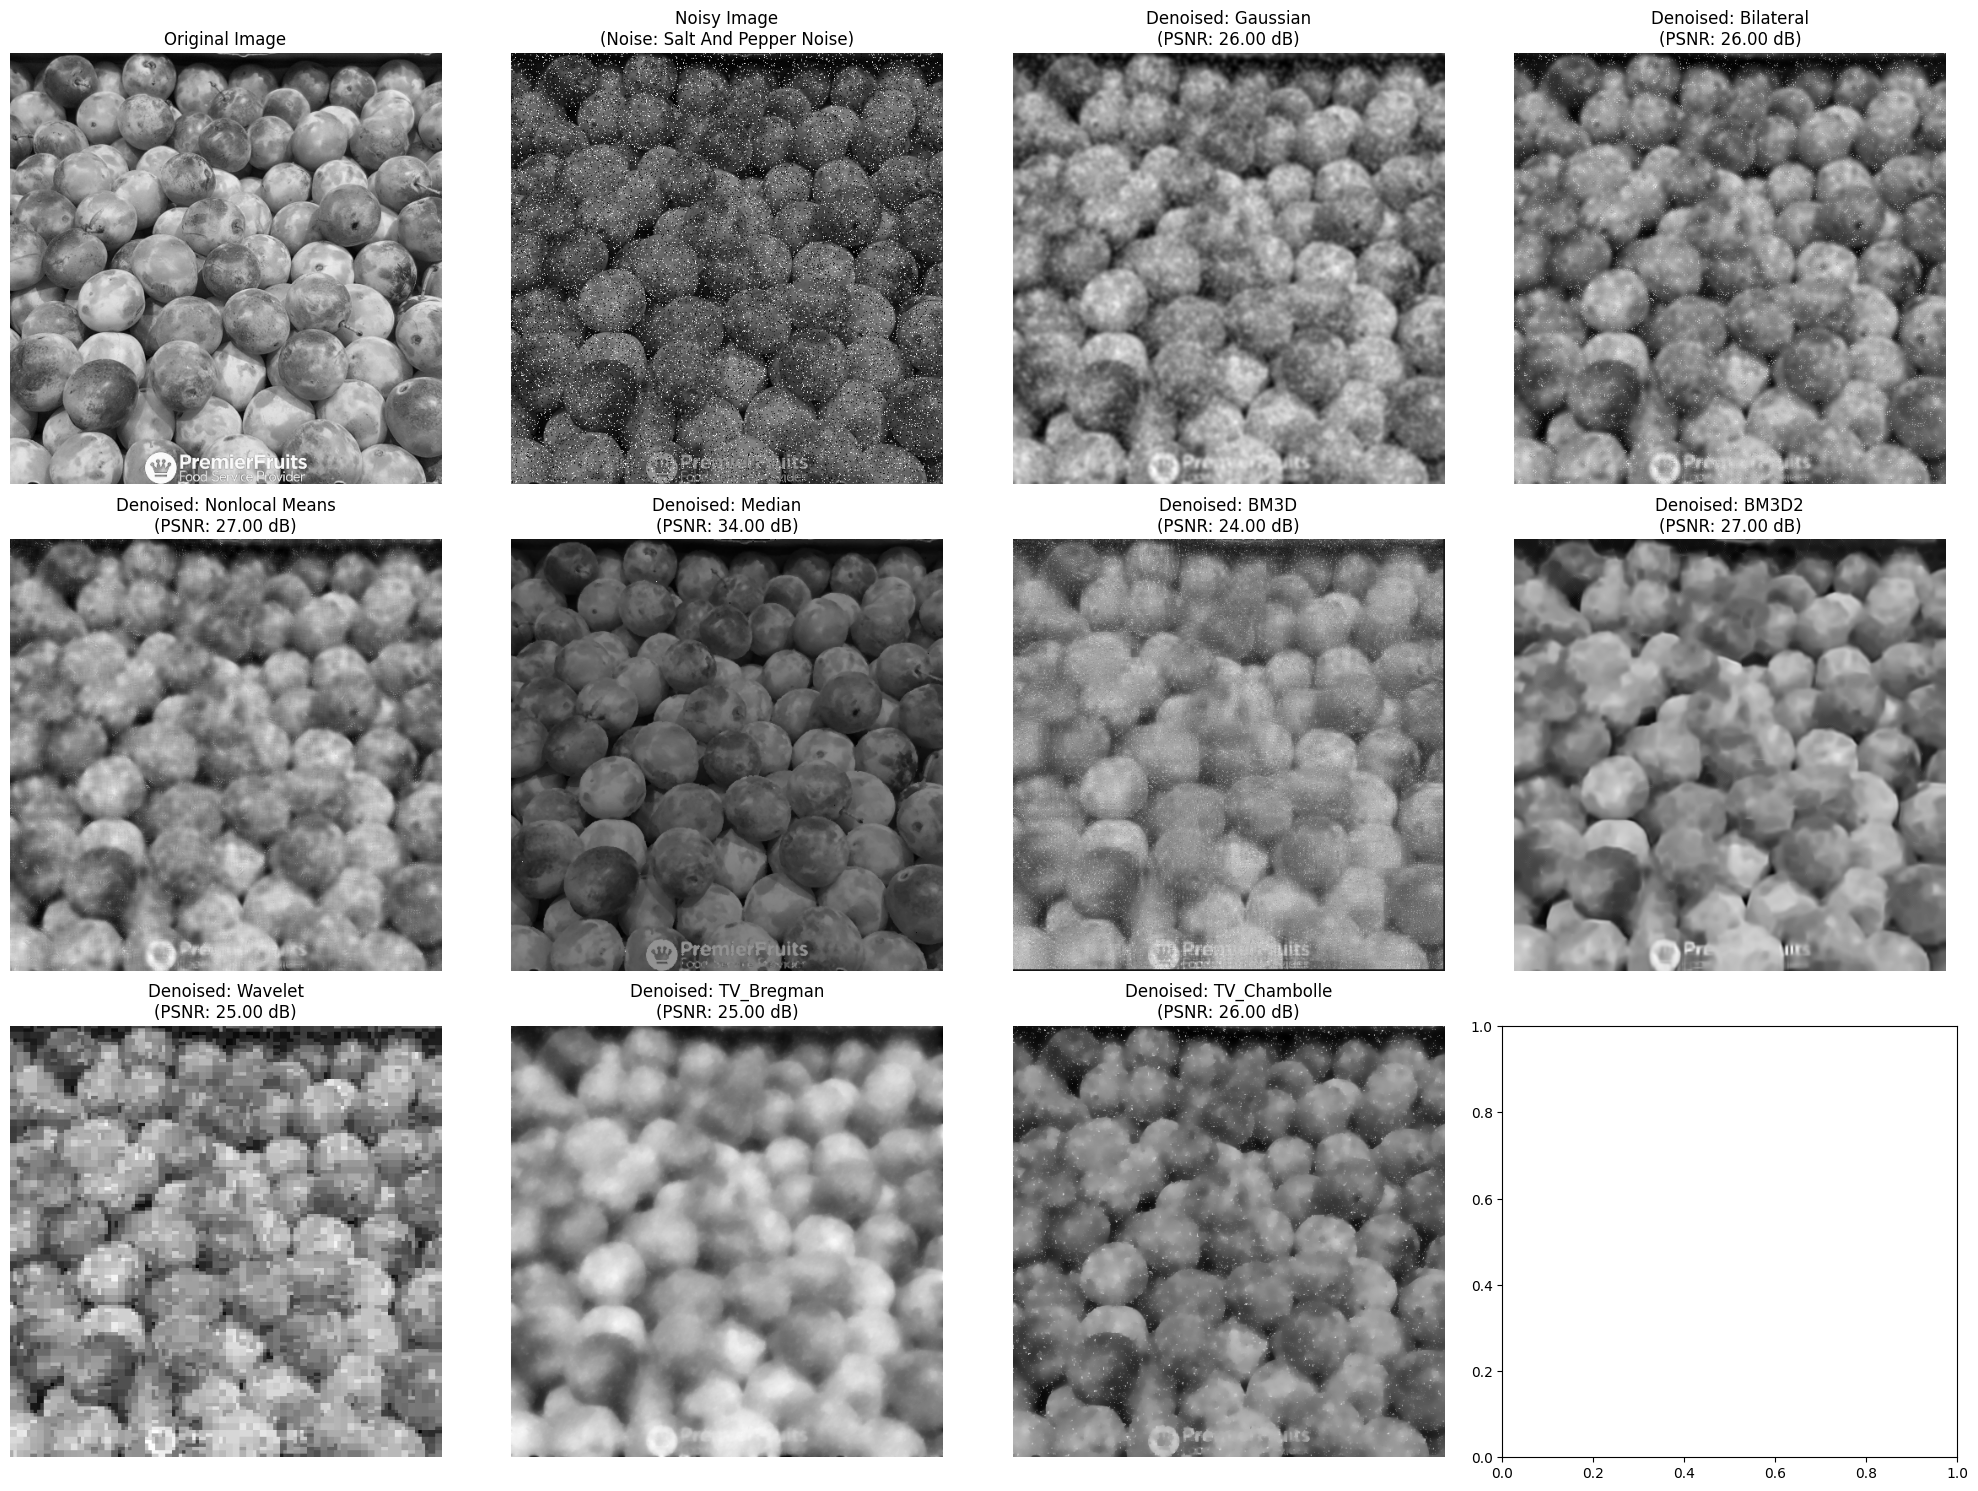

In [17]:
helper_func.plot_all_denoised(original=image, noisy=noisy_image, all_denoised=evaluator.all_denoised, 
                              method_names=evaluator.method_names, psnrs=evaluator.all_psnrs, noise_type=noise_type)

<div class="alert alert-block alert-warning">
**Note:** From Here is not Important
</div>
